In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Experiment : Avg time taken to reach office

Take a sample of 'n' people, ask them to record the time taken from waking up to reaching their office desk over a period of  'wd' working days.

The data is captured for 5 types of activities: [a] getting ready, [b] commuting from home to office, [c] parking vehicle, [d] taking a lift to the floor, [e] signing in and walking to their assigned desk.

For each of these uniform distribution is assumed.

In [3]:
# generate data
n = 10000 # participants
wd = 200 # working days in a year
getready = np.random.uniform(low=20,high=60,size=n*wd).reshape(n,wd)
commute = np.random.uniform(low=15,high=30,size=n*wd).reshape(n,wd)
park = np.random.uniform(low=1,high=5,size=n*wd).reshape(n,wd)
lift = np.random.uniform(low=2,high=6,size=n*wd).reshape(n,wd)
signin = np.random.uniform(low=0,high=3,size=n*wd).reshape(n,wd)
total = getready + commute + park + lift + signin

In [4]:
# this array now has rows representing each participant and columns representing working days in the year
# each value here is the time elapsed from waking up to reaching office desk for a participant on a particular day.
total.shape

(10000, 200)

In [5]:
# average across days so for each participant we get the average time elapsed
avgtime = np.mean(total,axis=1)
avgtime.shape

(10000,)

In [6]:
# min and max values
np.min(avgtime), np.max(avgtime)

(67.30178335796187, 74.05023621002496)

# Test if this data is normally distributed

In [7]:
# Ho of shapiro test is data comes from a normal distribution 

stats.shapiro(avgtime)

ShapiroResult(statistic=0.9997490644454956, pvalue=0.27547115087509155)

#### Since the p-value is > 0.05 we do not reject the null hypothesis i.e. in simple terms data is normal
As Joshua of StatQuest says "Bam!"

In [8]:
# property: normal distribution is symmetrical about its mean
# let us see the shape of the data by plotting

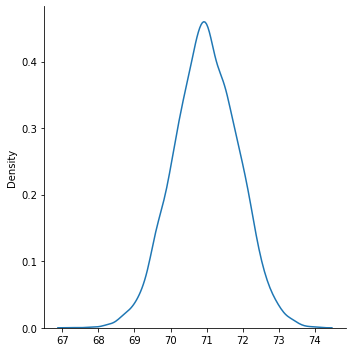

In [9]:
sns.displot(avgtime, kind='kde');

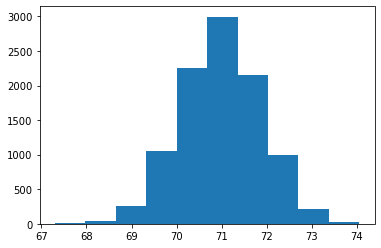

In [10]:
plt.hist(avgtime, bins = 10);

### property: in normal distributions mean and median are equal

In [11]:
np.mean(avgtime), np.median(avgtime) # these are very close

(70.97927766639029, 70.97390357964434)

### property: for continuous distributions the probability of a particular value occuring is zero

In [12]:
# let us select a value between the min and max of avgtime data and check this
val = np.random.uniform(min(avgtime),max(avgtime),1)
print("randomly generated value is ", val)
# we now look for that value in the dataset. chances of finding that exact value is low. hence probability is zero.
np.sum([avgtime==val]) / len(avgtime) # this computes the probability of spotting "val" in the dataset

randomly generated value is  [70.21268606]


0.0

In [13]:
# compute the mean and standard deviation of the dataset
mu = np.mean(avgtime)
s = np.std(avgtime)
print("mean :", mu," and sigma :",s)

mean : 70.97927766639029  and sigma : 0.8872681536811979


### property: area under bell curve within 1 sigma from mean is 68.3%

In [14]:
# let us test this in our dataset
# area under normal curve represents probability. Here we are exploring probability in a simple understand way by computing
# proportions. The denominator is the # of data elements in the dataset. Numerator is the count that satisfies the
# condition. So numerator is "how many of the values fall within 1 std dev from the mean of this dataset?"

np.sum([(avgtime<mu+1*s) & (avgtime>mu - 1*s)]) / len(avgtime) # that is close to expected

0.6777

### property: area under bell curve within 2 sigmas from mean is 95.4%

In [15]:
# let us test this in our dataset
np.sum([(avgtime<mu + 2*s) & (avgtime>mu - 2*s)]) / len(avgtime)

0.9567

### property: area under bell curve within 3 sigmas from mean is 99.7%

In [16]:
# let us test this in our dataset
np.sum([(avgtime<mu + 3*s) & (avgtime>mu - 3*s)]) / len(avgtime)

0.9978

# understanding probability density function

When we deal with continuous data (simply put, decimal data instead of integer data) the probability distributions are represented as values on horizontal axis and probability density on vertical axis. The probability itself is computed as area under the curve.

<img src='normalcurvearea.png' width="300" height="300" align="center"/>

In [17]:
# get the density at a given point
# in the data we generated, the peak occurs at the middle. we take a small slice, between lower limit LL and upper limit UL
# compute the area as the proportion of data points in that range. Use that to get the density i.e. the height

# LL and UL
LL = np.median(avgtime) - 0.1*s
UL = np.median(avgtime) + 0.1*s
print("lower and upper limits of the slice are ", LL," and ", UL)

# calculate the area as the proportion of values in this range
area = np.sum([(avgtime>LL) & (avgtime<UL)]) / len(avgtime)

# calculate the height of the shape approximating it as a rectangle since the slice is narrow.
height = area / (UL-LL)
print("height of curve near at the median is : ", height)

lower and upper limits of the slice are  70.88517676427622  and  71.06263039501246
height of curve near at the median is :  0.471672513279873


In [18]:
# compare this against theoretical density using stats library
height, stats.norm.pdf(mu,loc=mu,scale=s)

(0.471672513279873, 0.449629887814925)

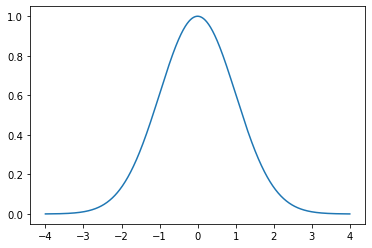

In [19]:
# visualization of e power -0.5*x^2
x = np.linspace(-4,4,num=1000)
pdf = np.exp(-0.5*(x**2))
plt.plot(x,pdf);

The probability density function is given by: 
<img src='normalpdf.png' width="300" height="300" align="center"/>

In [20]:
# in an earlier experiment we computed the density or height at the median of our dataset
# let us compare that with theoretically calculated density at density
x = np.median(avgtime)
pdf = 1/(s*np.sqrt(2*np.pi)) * np.exp(-0.5*((x - mu)**2/s**2))
print(pdf)

0.44962164034481816


In [21]:
# this is close to the height we had estimated earlier
print(height)

0.471672513279873


So we can understand density as the height of the curve such that the area represents probabilities. And the proportion of values in the dataset give us the area in a range. Hope this helped see serious terms like probability distribution, density and see them as simple counts and proportions that we all can playfully relate to

# Experiment: Total working hours
In the previous experiment we looked at time taken by staff members to reach their desks
In this experiment let us model the total working hours in a similar organization

There were n employees in that organization. Let us model these employees working hours using several distributions for fun sake and see how that adds up.

#### Simulation design: Simple, uniform distributions
Let us consider these 7 hour work days where people are observed to put in anywhere between 6 to 9 hours. We can start this with a simple assumption that they are are uniform distributions, meaning any number in this range has equal probability of occuring.

In [22]:
LL = 6
UL = 9
# Let us see how this output is for 5 employees for one day
np.random.uniform(LL,UL,5)

array([7.30382336, 6.61073723, 6.34769015, 6.08817178, 7.68549443])

In [23]:
# Let us see how this output is for 5 employees for a week of two working days
np.random.uniform(LL,UL,10).reshape(2,5)

array([[6.62704245, 6.05910528, 7.59063795, 7.62114371, 8.59753579],
       [6.07177527, 7.87006996, 8.52441435, 7.78099161, 6.2542077 ]])

In [24]:
# Let us total the working hours across these 5 employees for each day
np.sum(np.random.uniform(LL,UL,10).reshape(2,5), axis=1)

array([40.73297798, 33.29024224])

In [25]:
# now that we have the basic pattern in place let us scale this to get total working hours for wd days for n employees
n = 10000
wd = 200
data = np.sum(np.random.uniform(LL,UL,n*wd).reshape(wd,n), axis=1)

In [26]:
# this contains the total working hours for n employees for wd days
data.shape

(200,)

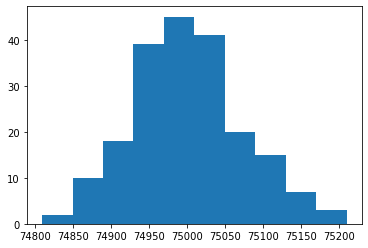

In [27]:
# let us see the shape of this data
plt.hist(data, bins = 10);

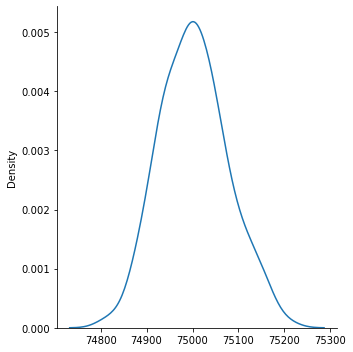

In [28]:
sns.displot(data, kind='kde');

In [29]:
# shapiro normality test
# Ho: data is normally distributed vs Ha: data is not normally distributed
stats.shapiro(data)

ShapiroResult(statistic=0.9943199753761292, pvalue=0.6484100818634033)

#### awesome right?
the p-value above 0.05 here means we do not reject the null hypothesis and in simple terms, data is normally distributed
Note, we have just wd = 200 here. If it was a higher number like 10000 the curve will be even more bell-ish

### simulation design: hash of various distributions
This time let us make the data generation process more complex by assuming employee working hours follow many known distributions


In [30]:
# each row here represents 1/5 th of the n employees
# for each of these 5 categories we select a popular distribution
# effectively each row generates data for n/5 employees for wd days 

n = 10000
wd = 200
LL=6
UL=9
datasize = int(n*wd/5)
# type 1: uniform distribution
data1 = np.random.uniform(LL,UL,datasize).reshape(-1,wd)
# type 2: binomial distribution
data2 = np.random.binomial(UL, 0.8, size=datasize).reshape(-1,wd)
# type 3: poisson distribution
data3 = np.random.poisson(lam=(UL+LL)/2,size = datasize).reshape(-1,wd)
# type 4: chisquare distribution
data4 = np.random.chisquare(df=(UL+LL)/2,size = datasize).reshape(-1,wd)
# type 5: skewed normal distribution
data5 = stats.skewnorm.rvs(loc=LL,a=2,size=datasize).reshape(-1,wd)

data1.shape, data2.shape, data3.shape, data4.shape, data5.shape

((2000, 200), (2000, 200), (2000, 200), (2000, 200), (2000, 200))

In [31]:
# consolidate into one dataset for wd days
data = np.sum(data1 + data2 + data3 + data4 + data5, axis=0)
data.shape # 

(200,)

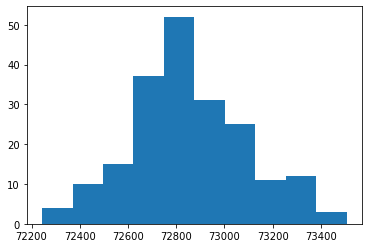

In [32]:
# let us see the shape of this data
plt.hist(data, bins = 10);

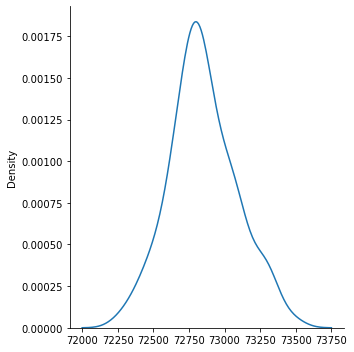

In [33]:
sns.displot(data, kind='kde');

In [34]:
# shapiro normality test
# Ho: data is normally distributed vs Ha: data is not normally distributed
stats.shapiro(data)

ShapiroResult(statistic=0.9902693629264832, pvalue=0.1955662965774536)

In [35]:
# this is also normally distributed